# Projet 2 : Explorer et comprendre les performances des employés

## 🎯 Contexte

Dans un contexte de gestion RH, une entreprise souhaite mieux comprendre les performances de ses employés pour identifier :

- Les écarts de performance entre les collaborateurs
- Les profils à fort potentiel ou à risque
- Les leviers d’amélioration organisationnels

## 🧪 Objectif

L’objectif de ce projet est de mener une **analyse descriptive et exploratoire des performances** des employés, à travers leurs caractéristiques démographiques, leur niveau d’engagement, leur satisfaction et leur statut professionnel.  
Ce projet vise à comprendre les écarts de performance des employés afin d’identifier des profils atypiques et formuler des recommandations RH concrètes.
Une attention particulière sera portée à la compréhension des **cas de départs**, dans une logique d’**anticipation du turnover**.


# 🔍 Exploration des données

Dans cette étape, nous allons :
- Charger et examiner le jeu de données RH
- Comprendre la structure et les variables disponibles

## Librairies

In [1]:
# Librairies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tabulate import tabulate

## Informations sur la data frame

In [2]:
# Importation de la base de données
if os.path.exists("HRDataset_v14.csv"):
    HR = pd.read_csv("HRDataset_v14.csv")  # Local
else:
    url = "https://raw.githubusercontent.com/GeraudTozo/DATA-ANALYST-PROJECT/refs/heads/main/P2/HRDataset_v14.csv"
    HR = pd.read_csv(url)  # Colab ou cloud

# Visualisation du data set
display(HR)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


La base de donnée est composée alors de **311** individus caractérisés par **36** variables.

In [3]:
# Selection des variables necessaires pour l'analyse en supprimant les autres variables 
HR=HR.drop(columns={'EmpID', 'MarriedID', 'MaritalStatusID','EmpStatusID', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'FromDiversityJobFairID','PositionID', 'Position', 'State', 'Zip', 'DOB','DateofHire', 'DateofTermination', 'ManagerName', 'ManagerID','LastPerformanceReview_Date'})

In [4]:
# Liste des variables
HR.columns

Index(['Employee_Name', 'GenderID', 'DeptID', 'PerfScoreID', 'Salary', 'Termd',
       'Sex', 'MaritalDesc', 'TermReason', 'EmploymentStatus', 'Department',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [5]:
# Decompte de valeurs manquantes ou incomplètes par variables
HR.isnull().sum()

Employee_Name           0
GenderID                0
DeptID                  0
PerfScoreID             0
Salary                  0
Termd                   0
Sex                     0
MaritalDesc             0
TermReason              0
EmploymentStatus        0
Department              0
RecruitmentSource       0
PerformanceScore        0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
DaysLateLast30          0
Absences                0
dtype: int64

La base ne comporte pas de valeurs manquantes pour les variables.

In [6]:
# Compter les doublons
HR.duplicated().sum()

0

Ce resultat démontre que notre base ne compte pas de doublons.

# 🧍‍♂️ Profil des employés

Avant d’analyser les performances, observons d’abord le profil global des employés dans l’entreprise.

Nous allons explorer :

- La répartition par sexe
- Le statut marital
- Le statut professionnel
- La répartition par département


## 👥 Sexe des employés

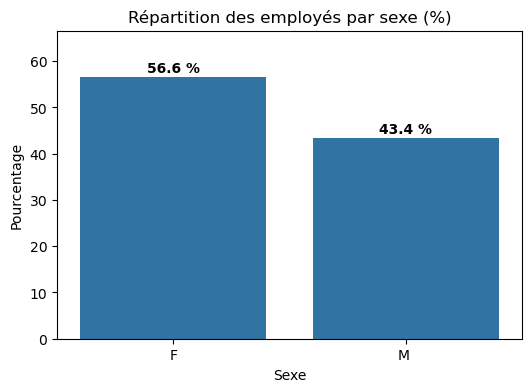

In [7]:

# Calcul des fréquences
sex_counts = HR['Sex'].value_counts(normalize=True) * 100  # Pourcentages
sex_labels = sex_counts.index
sex_values = sex_counts.values

# Barplot avec annotations
plt.figure(figsize=(6,4))
ax = sns.barplot(x=sex_labels, y=sex_values)

# Annoter les barres avec les pourcentages
for i, v in enumerate(sex_values):
    ax.text(i, v + 1, f'{v:.1f} %', ha='center', fontweight='bold')

plt.title('Répartition des employés par sexe (%)')
plt.ylabel('Pourcentage')
plt.xlabel('Sexe')
plt.ylim(0, max(sex_values) + 10)
plt.show()


**Interprétation**

On observe que la majorité des employés sont des femmes (56,6%). Cette information peut nous aider à détecter d’éventuels biais ou différences de performance selon le genre.


## 💍 Statut Marital

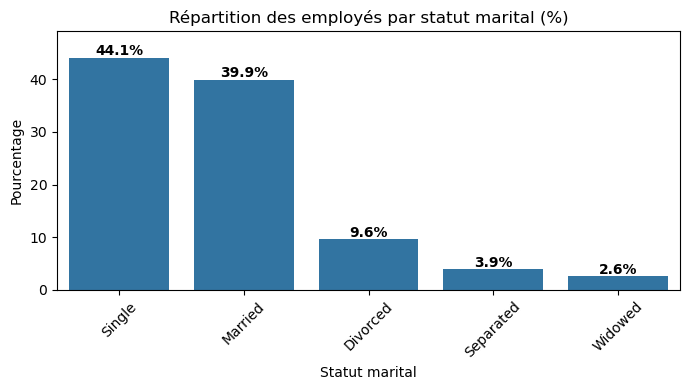

In [8]:
# Calcul pour MaritalDesc
marital_table = HR['MaritalDesc'].value_counts(normalize=True).mul(100).round(1).to_frame(name='Pourcentage')
marital_table['Statut'] = marital_table.index

# Barplot
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=marital_table, x='Statut', y='Pourcentage')

# Annotations
for i, row in marital_table.iterrows():
    ax.text(i, row['Pourcentage'] + 0.5, f"{row['Pourcentage']}%", ha='center', fontweight='bold')

plt.title('Répartition des employés par statut marital (%)')
plt.ylabel('Pourcentage')
plt.xlabel('Statut marital')
plt.xticks(rotation=45)
plt.ylim(0, marital_table['Pourcentage'].max() + 5)
plt.tight_layout()
plt.show()


**Interprétation**  
La population des employés est majoritairement **célibataire (44,1 %)**, suivie de près par les **mariés (39,9 %)**.  Les statuts **divorcé (9,6 %)**, **séparé (3,9 %)** et **veuf (2,6 %)** sont plus minoritaires.

Cette répartition pourra être prise en compte dans les comparaisons de performance, de satisfaction ou d’engagement entre groupes sociaux.


## 🏢 Répartition par département

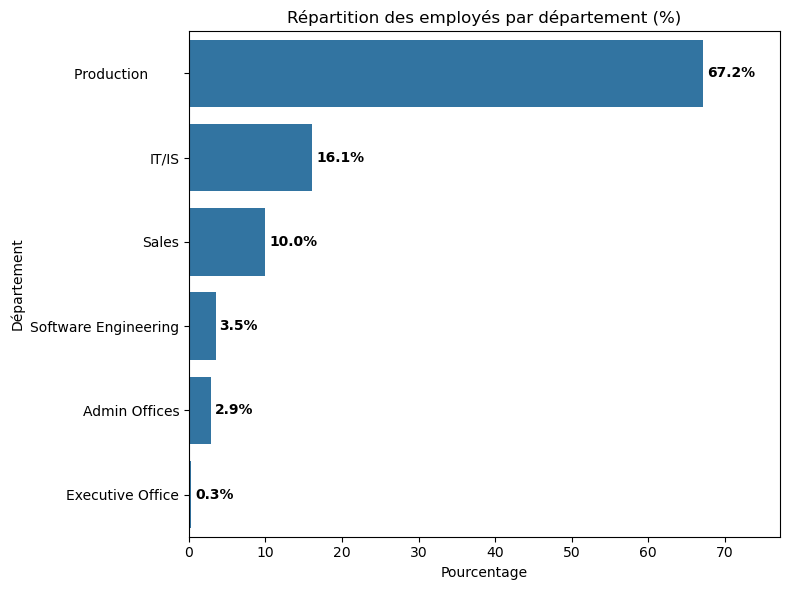

In [9]:
# Calcul pour Department
dept_table = HR['Department'].value_counts(normalize=True).mul(100).round(1).to_frame(name='Pourcentage')
dept_table['Département'] = dept_table.index

# Barplot horizontal
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=dept_table, y='Département', x='Pourcentage')

for i, row in dept_table.iterrows():
    ax.text(row['Pourcentage'] + 0.5, i, f"{row['Pourcentage']}%", va='center', fontweight='bold')

plt.title('Répartition des employés par département (%)')
plt.xlabel('Pourcentage')
plt.ylabel('Département')
plt.xlim(0, dept_table['Pourcentage'].max() + 10)
plt.tight_layout()
plt.show()

**Interprétation :**  
La majorité des employés (67,2 %) travaillent dans le département **Production**, ce qui en fait le cœur opérationnel de l’entreprise.  
Viennent ensuite les services **IT/IS (16,1 %)** et **Sales (10,0 %)**, qui représentent ensemble près d’un employé sur quatre.

Les autres départements — **Software Engineering (3,5 %)**, **Admin Offices (2,9 %)** et **Executive Office (0,3 %)** — sont beaucoup plus restreints.

Cette forte concentration dans quelques services devra être prise en compte dans l’analyse des performances, car elle peut biaiser la moyenne générale ou masquer des particularités propres à chaque équipe.


## 💼 Statut professionnel

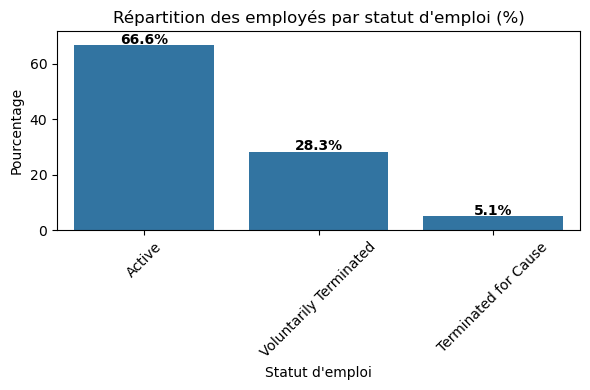

In [10]:
# Calcul pour EmploymentStatus
status_table = HR['EmploymentStatus'].value_counts(normalize=True).mul(100).round(1).to_frame(name='Pourcentage')
status_table['Statut'] = status_table.index

# Barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=status_table, x='Statut', y='Pourcentage')

for i, row in status_table.iterrows():
    ax.text(i, row['Pourcentage'] + 0.5, f"{row['Pourcentage']}%", ha='center', fontweight='bold')

plt.title("Répartition des employés par statut d'emploi (%)")
plt.ylabel('Pourcentage')
plt.xlabel('Statut d\'emploi')
plt.xticks(rotation=45)
plt.ylim(0, status_table['Pourcentage'].max() + 5)
plt.tight_layout()
plt.show()

**Interprétation :**  
Environ **66,6 %** des employés sont actuellement en **activité** dans l’entreprise.  
Près d’un tiers (28,3 %) ont **quitté volontairement** leur poste, ce qui peut indiquer un **turnover important**.  
Enfin, **5,1 %** des employés ont été **licenciés pour motif disciplinaire**, un taux relativement faible mais à surveiller.

Cette répartition met en lumière la nécessité de mieux comprendre les facteurs de départs volontaires (satisfaction, performance, etc.), qui seront approfondis dans une prochaine section.

## Synthèse du profil des employés

À partir de l'analyse descriptive des variables démographiques et organisationnelles, nous pouvons dresser le profil moyen des employés de l’entreprise :

- 👩‍💼 **Sexe** : La majorité des employés sont des **femmes** (56,6 %), contre 43,4 % d’hommes.
- 💍 **Statut marital** : **44,1 %** des employés sont **célibataires**, 39,9 % sont **mariés**, les autres (divorcés, séparés, veufs) restent minoritaires.
- 💼 **Statut professionnel** : **66,6 %** des employés sont actuellement **actifs** dans l’entreprise.
- 🏭 **Département** : La répartition est très concentrée : **67,2 %** des employés sont dans le département **Production**, suivi de **IT/IS (16,1 %)** et **Sales (10 %)**.

**Conclusion :**
> Le profil type de l’employé est une **femme célibataire, active, travaillant dans la production**.  
> Ce profil servira de référence pour évaluer les disparités de performance dans la prochaine section.

# 📈 Analyse des performances des employés
Nous allons explorer les différences de performance entre les groupes d’employés selon des variables clés :
- Sexe
- Département
- Statut professionnel
- Statut marital

Nous étudierons également la corrélation entre la performance et les variables telles que : l'engagement, la satisfaction et le salaire.

## Distribution globale des performances

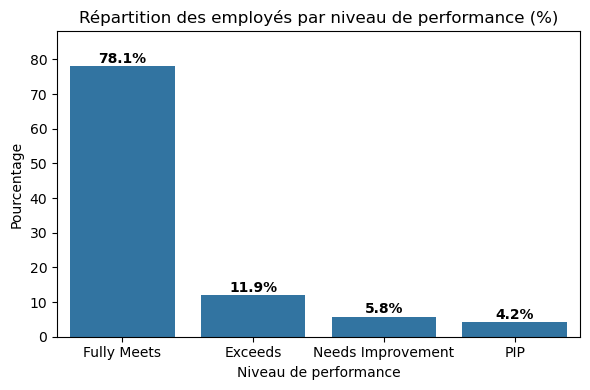

In [11]:
perf_table = HR['PerformanceScore'].value_counts(normalize=True).mul(100).round(1).to_frame(name='Pourcentage')
perf_table['Performance'] = perf_table.index

plt.figure(figsize=(6,4))
ax = sns.barplot(data=perf_table, x='Performance', y='Pourcentage')

for i, row in perf_table.iterrows():
    ax.text(i, row['Pourcentage'] + 1, f"{row['Pourcentage']}%", ha='center', fontweight='bold')

plt.title('Répartition des employés par niveau de performance (%)')
plt.xlabel('Niveau de performance')
plt.ylabel('Pourcentage')
plt.ylim(0, perf_table['Pourcentage'].max() + 10)
plt.tight_layout()
plt.show()

**Interprétation :**

Une grande majorité des employés (**78,1 %**) sont évalués comme **“Fully Meets Expectations”**, ce qui indique que l’entreprise fonctionne sur une base solide avec des employés qui atteignent les objectifs fixés.

Cependant, seulement **11,9 %** des employés **dépassent les attentes (“Exceeds”)**, ce qui peut suggérer un potentiel de progression plus limité ou un système d’évaluation exigeant pour accéder à une note élevée.

À l’inverse, **10 %** des employés sont dans des catégories préoccupantes :
- **5,8 %** sont en “Needs Improvement”
- **4,2 %** sont sous “Performance Improvement Plan (PIP)”

Ces derniers devraient faire l’objet d’un suivi ciblé, car ils peuvent impacter la productivité globale, mais aussi signaler des difficultés d’intégration, de formation, ou de management.

## 👥 Performance selon le sexe des employés

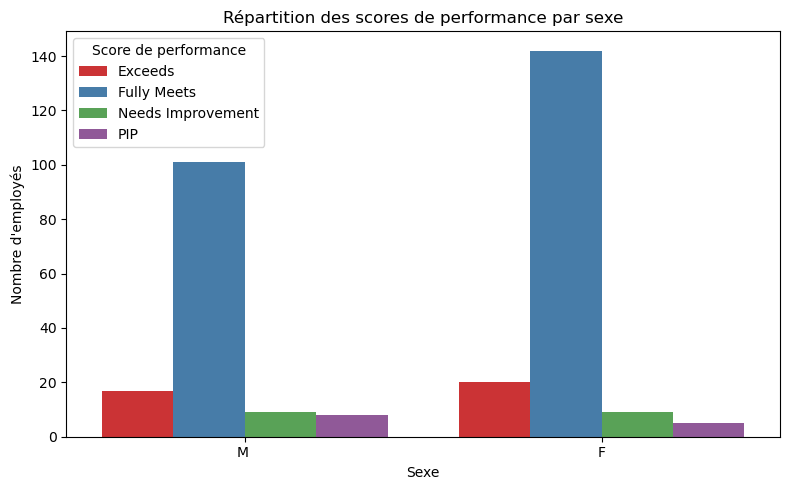

In [12]:
# Répartition détaillée des scores par sexe
plt.figure(figsize=(8, 5))
sns.countplot(data=HR, x='Sex', hue='PerformanceScore', palette='Set1')
plt.title("Répartition des scores de performance par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'employés")
plt.legend(title="Score de performance")
plt.tight_layout()
plt.show()


Les femmes affichent un score moyen de performance de 3.0, légèrement supérieur à celui des hommes qui est de 2.8 (sur une échelle de 1 à 4). Cela suggère que globalement, les femmes ont une performance un peu meilleure en moyenne.

On remarque que la proportion d'hommes dans les catégories les plus basses (“PIP” et “Needs Improvement”) est presque deux fois plus élevée que chez les femmes (12.6% vs 7.9%).
À l’inverse, les femmes sont plus nombreuses à être dans la catégorie “Fully Meets” (80.7% vs 74.8%), ce qui contribue à leur moyenne plus élevée.
La part des meilleurs scores (“Exceeds”) est légèrement plus importante chez les hommes (12.6% vs 11.4%), mais la différence est faible.

**Conclusion**

Cette analyse suggère que les femmes dans l’entreprise tendent à mieux performer en moyenne, avec moins de cas critiques, même si les meilleurs éléments sont répartis de façon assez équilibrée entre sexes.
Il pourrait être intéressant d’approfondir avec une analyse croisée par département pour mieux comprendre ces écarts.

## 🏢 Performance selon la Répartition par département des employés

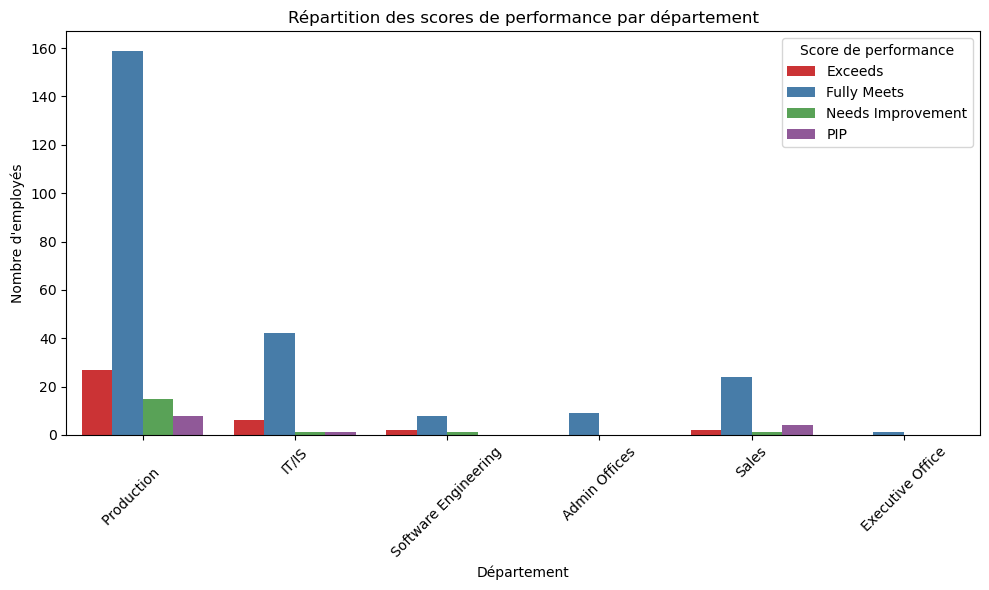

In [13]:
# Répartition détaillée des scores par département
plt.figure(figsize=(10, 6))
sns.countplot(data=HR, x='Department', hue='PerformanceScore', palette='Set1')
plt.title("Répartition des scores de performance par département")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=45)
plt.legend(title="Score de performance")
plt.tight_layout()
plt.show()

Les départements Admin Offices et Executive Office ont un score moyen de 2.9, avec 100 % des employés “Fully Meets” (pas de cas faibles ni d’exceptions).

IT/IS et Software Engineering affichent les scores moyens les plus élevés (3.0), avec une bonne part de “Exceeds” (12 % et 18 %).

Production et Sales ont des moyennes légèrement plus basses (2.8–2.9), avec plus de cas “PIP” et “Needs Improvement”, surtout dans Sales (12.9% PIP).

Les départements techniques ont tendance à mieux performer, tandis que Sales présente plus de cas faibles, ce qui pourrait justifier un accompagnement ciblé.

En somme, il serait intéressant d’approfondir l’analyse dans les départements **Sales** et **Production** où les taux d’employés en difficulté sont plus élevés, pour identifier des leviers d’amélioration.  
À l’inverse, **Software Engineering** semble attirer et/ou retenir des profils très performants, mais doit également gérer des écarts importants de performance.

## 💼 Performance selon le statut professionnel des employés

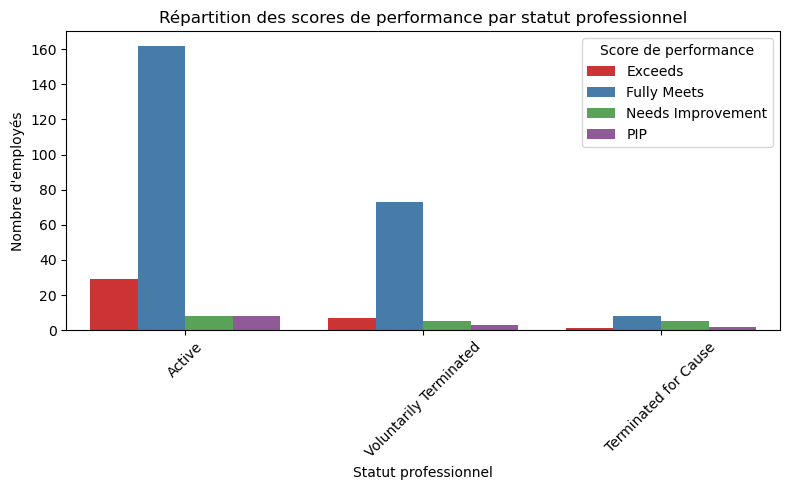

In [14]:
# Répartition détaillée des scores par statut professionnel
plt.figure(figsize=(8, 5))
sns.countplot(data=HR, x='EmploymentStatus', hue='PerformanceScore', palette='Set1')
plt.title("Répartition des scores de performance par statut professionnel")
plt.xlabel("Statut professionnel")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=45)
plt.legend(title="Score de performance")
plt.tight_layout()
plt.show()

Les employés actifs et ceux qui ont volontairement terminés ont un score moyen similaire d’environ 3, avec une majorité en “Fully Meets” (78-83%).

Ceux du statut “Terminated for Cause” affichent une moyenne plus basse (2.5), avec une part importante en “PIP” (12.5%) et “Needs Improvement” (31.2%).

Conclusion : Le statut “Terminated for Cause” correspond à des performances nettement plus faibles, ce qui confirme la cohérence des données et peut aider à cibler les actions RH.

### Conclusion

Les performances varient significativement selon le sexe, le département et le statut professionnel.

Les femmes tendent à afficher une meilleure performance moyenne que les hommes, avec moins de cas faibles.

Les départements techniques (IT/IS, Software Engineering) ont de meilleurs scores moyens, tandis que le département "Sales" montre plus de difficultés.

Le statut professionnel est un facteur clé : les employés appartenant au statut "Terminated for Cause" ont nettement des performances plus faibles.

Le statut marital a peu d’influence sur la performance dans ce jeu de données.

Cette étape confirme que la performance est liée à plusieurs facteurs démographiques et organisationnels, ce qui orientera les analyses plus fines et les recommandations.

## Analyse de la relation entre performance et certaines variables

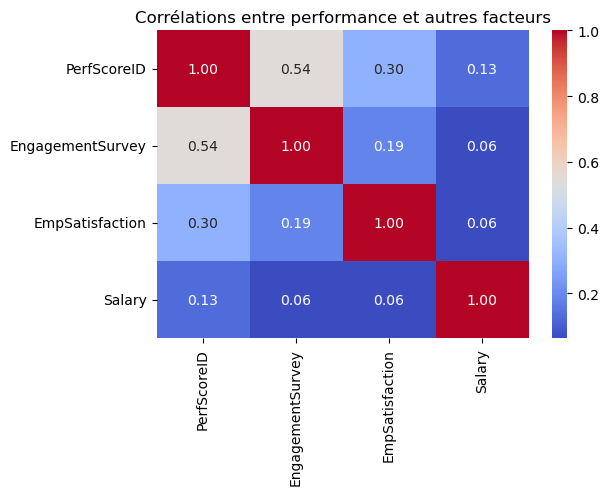

In [15]:
### Corrélations avec d'autres facteurs
# Sélection des variables d'intérêt
vars_corr = ['PerfScoreID', 'EngagementSurvey', 'EmpSatisfaction', 'Salary']

# Calcul de la matrice de corrélation
corr_matrix = HR[vars_corr].corr()

# Affichage de la matrice avec seaborn
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélations entre performance et autres facteurs")
plt.show()

La performance (PerfScoreID) est modérément corrélée à l’engagement des employés (EngagementSurvey) avec un coefficient de 0.54, ce qui indique qu’un meilleur engagement tend à s’accompagner d’une meilleure performance.

La satisfaction des employés (EmpSatisfaction) est aussi positivement liée à la performance, mais de façon plus faible (0.30).

Le salaire montre une corrélation faible (0.13) avec la performance, suggérant que la rémunération n’est pas un facteur principal ou que la relation est plus complexe.

### Performance et Engagement des employés

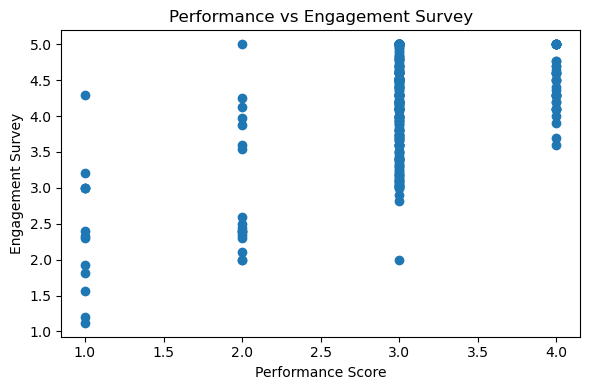

Coefficient de corrélation de Spearman: 0.3762905685520259
Valeur p: 6.73718021800905e-12


In [16]:
plt.figure(figsize=(6,4))
plt.scatter(HR['PerfScoreID'], HR['EngagementSurvey'])
plt.title('Performance vs Engagement Survey')
plt.xlabel('Performance Score')
plt.ylabel('Engagement Survey')
plt.tight_layout()
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(HR['PerfScoreID'], HR['EngagementSurvey'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Cette visualisation et ce test confirment egalement qu'il y a une relation modédément positive entre la performance et l’engagement des employés. Alors plus les employé se sentent engagés dans leur travail et dans l'entreprise, meuilleures sont leurs performance. 

Les efforts pour renforcer l'engagement (clarté des objectifs, reconnaissance, sens du travail) peuvent avoir un impact direct et mesurable sur la productivité.

### Performance et Satisfaction des employés

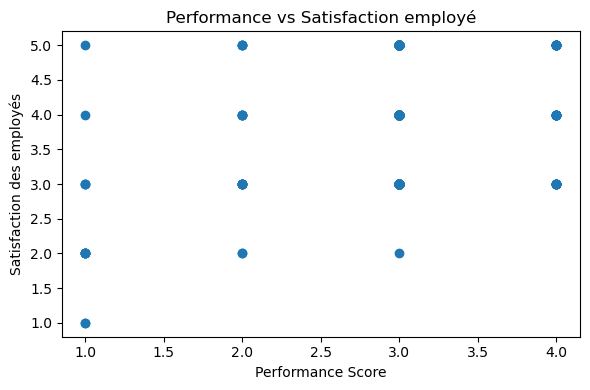

Coefficient de corrélation de Spearman: 0.20851442993252042
Valeur p: 0.00021292173617220217


In [17]:
plt.figure(figsize=(6,4))
plt.scatter(HR['PerfScoreID'], HR['EmpSatisfaction'])
plt.title('Performance vs Satisfaction employé')
plt.xlabel('Performance Score')
plt.ylabel('Satisfaction des employés')
plt.tight_layout()
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(HR['PerfScoreID'], HR['EmpSatisfaction'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Il existe une légère relation positive et significative entre la satisfaction et la performance des enployés. Autrement dit, Les employés satisfaits de leur environnement, de leurs conditions de travail ou de leurs missions tendent à être un peu plus performants. 

Ameliorer le climat de travail (conditions materielles, management, bien-être) peut contribuer à une meilleure performance.

### Performance et Salaire des employés

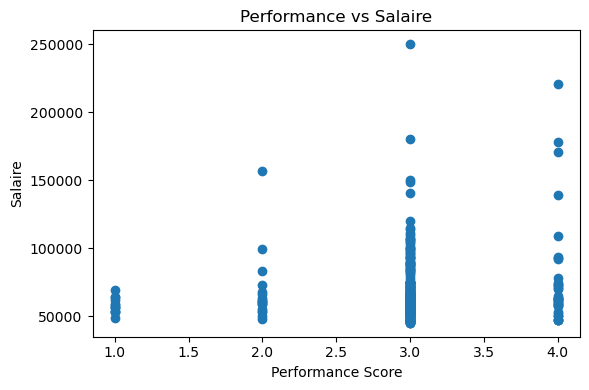

Coefficient de corrélation de Spearman: 0.08817157286030049
Valeur p: 0.12073765853567471


In [18]:
plt.figure(figsize=(6,4))
plt.scatter(HR['PerfScoreID'], HR['Salary'])
plt.title('Performance vs Salaire')
plt.xlabel('Performance Score')
plt.ylabel('Salaire')
plt.tight_layout()
plt.show()

# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(HR['PerfScoreID'], HR['Salary'])
print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Comme on peut le constaté, il n'y a pas de lien significatif entre le salaire et la performance. Ainsi, à salaire équivalent, les performances varient peu. Inversement, un salaire plus élevé ne garantit pas une meilleure performance.
Il en ressort que l'augmentation de salaire seule n'améliore pas necessairement la performance. Vaut mieux cibler des leviers motivationnels plus qualitatifs comme l'engagement ou la reconnaissance.


### En definitif, pour **améliorer les performances, il est plus efficace d'agir sur la motivation, l'implication et le climat de travail, plutôt que sur la remuneration seule.**

# 🚨 Identification des profils atypiques

Nous identifions ici deux groupes clés :
- Les top performers (ex. : top 10%)
- Les underperformers (ex. : bottom 10%)

Objectif : comprendre leurs caractéristiques et ce qui les distingue du reste des employés.

In [19]:
# Employés avec score = 1 (PIP)
outliers_low = HR[HR['PerfScoreID'] == 1]

# Employés avec score = 4 (Exceeds)
outliers_high = HR[HR['PerfScoreID'] == 4]

print("Employés sous-performants (PIP) :", len(outliers_low))
print("Employés très performants (Exceeds) :", len(outliers_high))


Employés sous-performants (PIP) : 13
Employés très performants (Exceeds) : 37



Ces profils méritent une attention particulière : un suivi RH peut être envisagé en croisant ces résultats avec leur engagement, leur satisfaction et leur salaire.

In [20]:
# Création d’un indicateur de type d’outlier
def classer_performance(score):
    if score == 1:
        return 'Sous-performant'
    elif score == 4:
        return 'Très performant'
    else:
        return 'Normal'

HR['ProfilPerformance'] = HR['PerfScoreID'].apply(classer_performance)

# Variables à comparer
vars_to_compare = ['Salary', 'EngagementSurvey', 'EmpSatisfaction']

# Moyennes par groupe
comparaison = HR.groupby('ProfilPerformance')[vars_to_compare].mean().round(2)
comparaison


,Salary,EngagementSurvey,EmpSatisfaction
ProfilPerformance,,,
Normal,68420.10,4.14,3.93
Sous-performant,57956.00,2.40,2.46
Très performant,77144.86,4.48,4.11




Les employés très performants ont un salaire moyen le plus élevé (77 145) et un plus haut niveau d’engagement (4.48) et de satisfaction (4.11). A contrario, les sous-performants se distinguent par un salaire plus faible (57 956) avec un engagement et une satisfaction nettement plus bas (respectivement 2.40 et 2.46)

En definitif, l'engagement et la satisfaction semblent être des facteurs prédictifs majeurs de la performance. Ces résultats suggèrent que l'entreprise pourrait agir sur ces leviers RH pour réduire les cas de sous-performance. Ainsi, l’entreprise devrait alors : 
- Investir dans les leviers d’engagement et de satisfaction pour améliorer la performance globale.
- Accompagner les employés en difficulté avec des actions ciblées (écoute, formation, motivation).
- Analyser les cas très performants pour reproduire les bonnes pratiques dans d’autres équipes.

In [21]:
# Employés en contre-performance
outliers_perf = HR[HR['PerfScoreID'].isin([1, 2])]

# Affichage
outliers_perf[['Employee_Name', 'Department', 'PerformanceScore', 'EmploymentStatus', 'EmpSatisfaction', 'EngagementSurvey',  'Absences']].head()


,Employee_Name,Department,PerformanceScore,EmploymentStatus,EmpSatisfaction,EngagementSurvey,Absences
23,"Blount, Dianna",Production,Needs Improvement,Active,3,2.00,3
53,"Cole, Spencer",Production,Needs Improvement,Terminated for Cause,3,2.00,16
54,"Corleone, Michael",Production,Needs Improvement,Active,2,4.13,3
64,"Dee, Randy",Production,Fully Meets,Active,4,4.30,2
67,"Delarge, Alex",Sales,PIP,Active,3,1.93,5


# Recommandations RH

À partir de l’analyse des données, voici quelques recommandations :

- **Retenir les top performers**

   - Identifier les conditions (salaires, départements, satisfaction) qui favorisent leur succès
   - Renforcer les leviers d’engagement et d’évolution


- **Améliorer les performances basses**

   - Repérer les départements ou groupes à faible performance
   - Mener des entretiens RH, renforcer la formation ou revoir l’organisation


- **Réduire les écarts entre groupes**

   - Mettre en place des politiques d’équité salariale ou d’accès à la formation
   - Tester des actions pilotes dans les départements sous-performants


## Conclusion
Ce projet montre comment l’analyse de données RH peut soutenir les décisions stratégiques de l’entreprise en identifiant les leviers de performance et d’engagement.


# Synthèse du projet

Ce projet visait à explorer les facteurs de performance des employés à travers une analyse de données RH. Les étapes ont permis de décrire la population (âge, sexe, statut, département…), d'analyser la distribution des performances, de comparer les scores selon des groupes-clés, d'explorer les liens avec l’engagement, la satisfaction et le salaire, d'identifier les profils atypiques (sous-performants / très performants) et de formuler des recommandations RH concrètes. 

Enfin, on peut conclure que la performance des employés semble étroitement liée à leur niveau d’engagement et de satisfaction. Alors, les actions RH devraient donc se concentrer sur l’amélioration de ces deux axes pour réduire les écarts de performance, de fidéliser les profils à fort potentiel et de créer un environnement de travail propice à l’excellence.

## BONUS : Zoom sur les départs

C:\Users\User\AppData\Local\Temp\ipykernel_3676\2544364197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=HR_departed, y='TermReason', palette='Set1', order=HR_departed['TermReason'].value_counts().index)


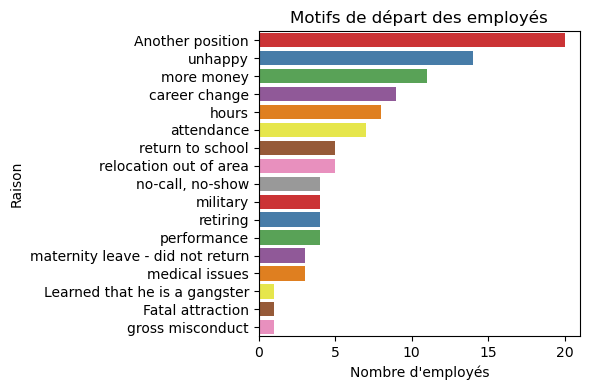

C:\Users\User\AppData\Local\Temp\ipykernel_3676\2544364197.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=HR_departed, y='Department', palette='Set1', order=HR_departed['Department'].value_counts().index)


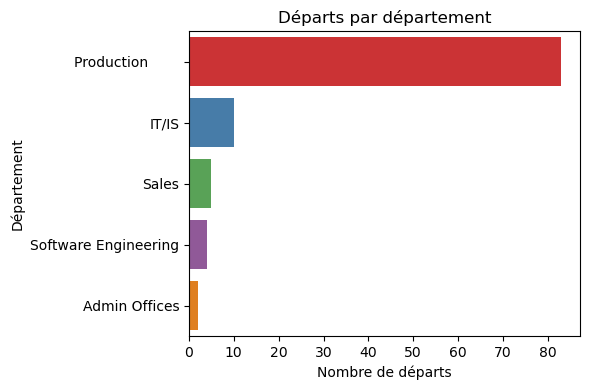

In [22]:
# 1. Filtrage des employés partis
HR_departed = HR[HR['EmploymentStatus'] != 'Active']
HR_active = HR[HR['EmploymentStatus'] == 'Active']

# 2. Répartition des motifs de départ
plt.figure(figsize=(6,4))
sns.countplot(data=HR_departed, y='TermReason', palette='Set1', order=HR_departed['TermReason'].value_counts().index)
plt.title("Motifs de départ des employés")
plt.xlabel("Nombre d'employés")
plt.ylabel("Raison")
plt.tight_layout()
plt.show()

# 3. Répartition des départs par département
plt.figure(figsize=(6,4))
sns.countplot(data=HR_departed, y='Department', palette='Set1', order=HR_departed['Department'].value_counts().index)
plt.title("Départs par département")
plt.xlabel("Nombre de départs")
plt.ylabel("Département")
plt.tight_layout()
plt.show()
